In [2]:
# Main Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import math
import os

# import operator for dictionary sorting operations
import operator

# preprocessing imports
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

# train-test split
from sklearn.model_selection import train_test_split

# linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# cross val, scored, scaler
from sklearn.model_selection import GridSearchCV,  cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import RobustScaler

# boxcox normalisation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# stacking
from sklearn.base import BaseEstimator, RegressorMixin, clone
import time

In [4]:
purchase_train = pd.read_csv('C:\\Acadgild docs\\ML\\Black friday hackthon\\train.csv')
sales_test = pd.read_csv('C:\\Acadgild docs\\ML\\Black friday hackthon\\test.csv')

In [5]:
# create train and test datasets
train = purchase_train.copy()
test = sales_test.copy()

In [6]:
#train.shape     # (550068, 12)
test.shape       # (233599, 11)

(233599, 11)

In [6]:
train.info()  # dtypes: float64(2), int64(5), object(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
categories = train.select_dtypes(include=['object']).columns
numericals = train.select_dtypes(include=['float64', 'int64']).columns
print('Num of Categories:  ' + str(len(categories)) + '\n' + 'Num of Values:  ', str(len(numericals)))
print('categories :', categories)
print('numericals :', numericals)

Num of Categories:  5
Num of Values:   7
categories : Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')
numericals : Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [10]:
train.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
User_ID,1000001,1000001,1000001,1000001,1000002,1000003,1000004,1000004,1000004,1000005
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442,P00193542,P00184942,P00346142,P0097242,P00274942
Gender,F,F,F,F,M,M,M,M,M,M
Age,0-17,0-17,0-17,0-17,55+,26-35,46-50,46-50,46-50,26-35
Occupation,10,10,10,10,16,15,7,7,7,20
City_Category,A,A,A,A,C,A,B,B,B,A
Stay_In_Current_City_Years,2,2,2,2,4+,3,2,2,2,1
Marital_Status,0,0,0,0,0,0,1,1,1,1
Product_Category_1,3,1,12,12,8,1,1,1,1,8
Product_Category_2,NaN,6,NaN,14,NaN,2,8,15,16,NaN


In [57]:
sales_test.tail(10).transpose()

,233589,233590,233591,233592,233593,233594,233595,233596,233597,233598
User_ID,1006030,1006032,1006033,1006035,1006036,1006036,1006036,1006036,1006037,1006039
Product_ID,P00241442,P00252442,P00127642,P00135742,P00255442,P00118942,P00254642,P00031842,P00124742,P00316642
Gender,M,M,M,F,F,F,F,F,F,F
Age,26-35,46-50,51-55,26-35,26-35,26-35,26-35,26-35,46-50,46-50
Occupation,17,7,13,1,15,15,15,15,1,0
City_Category,C,A,B,C,B,B,B,B,C,B
Stay_In_Current_City_Years,1,3,1,3,4+,4+,4+,4+,4+,4+
Marital_Status,1,0,1,0,1,1,1,1,0,1
Product_Category_1,2,8,1,6,8,8,5,1,10,4
Product_Category_2,15,NaN,2,8,NaN,NaN,8,5,16,5


# Data analysis :

In [12]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [15]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [16]:
train.describe(include = 'O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [17]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [18]:
test.describe(include = 'O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,233599,233599,233599,233599,233599
unique,3491,2,7,3,5
top,P00265242,M,26-35,B,1
freq,829,175772,93428,98566,82604


In [8]:
# Function provides details of missing columns
def missing_data_report(dataset, train_or_test = "Train"):
    missing_data = dataset.isnull().sum().sort_values(ascending=False)
    missing_data_percent = ((dataset.isnull().sum() / dataset.isnull().count()) * 100).sort_values(ascending=False)
    
    missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
    missing_report.rename_axis(train_or_test, inplace=True)
    
    return missing_report[missing_report > 0]

# Function to customise table display
def multi_table(table_list):
    from IPython.core.display import HTML
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [9]:
# Dataframe of missing data
train_missing, test_missing = missing_data_report(train, "Train"), missing_data_report(test, "Test")

# Top Ten Missing data report
multi_table([train_missing.head(), test_missing.head()])

,Total,Percentage
Train,,
Product_Category_3,383247.0,69.672659
Product_Category_2,173638.0,31.566643
Purchase,NaN,NaN
Product_Category_1,NaN,NaN
Marital_Status,NaN,NaN
,Total,Percentage
Test,,
Product_Category_3,162562.0,69.590195
Product_Category_2,72344.0,30.969311


In [34]:
# Check for NAs

def checknulls(df):
    nullcols = df.isnull().sum().sort_values(ascending=False)
    return nullcols[nullcols>0]

checknulls(train)
#checknulls(test)

Product_Category_3    383247
Product_Category_2    173638
dtype: int64

Correlation matrix This is done to have a clear picture on the correlation between columns in the dataset.**

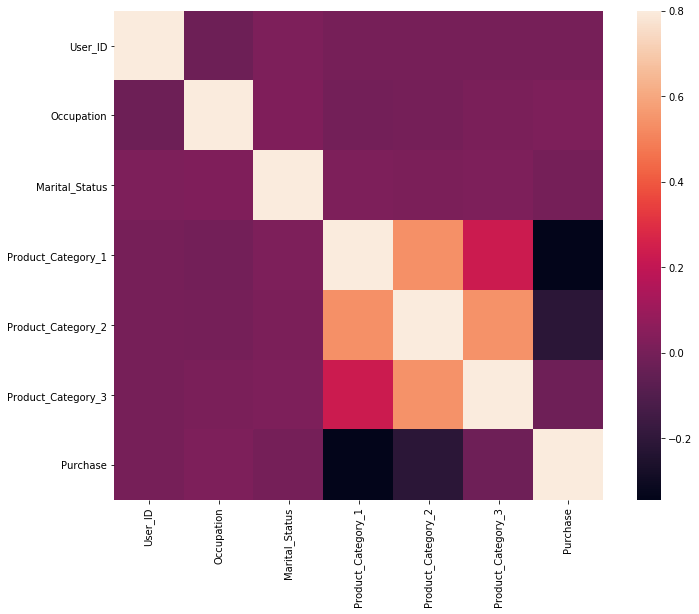

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True)

Distribution of significant numerical variables

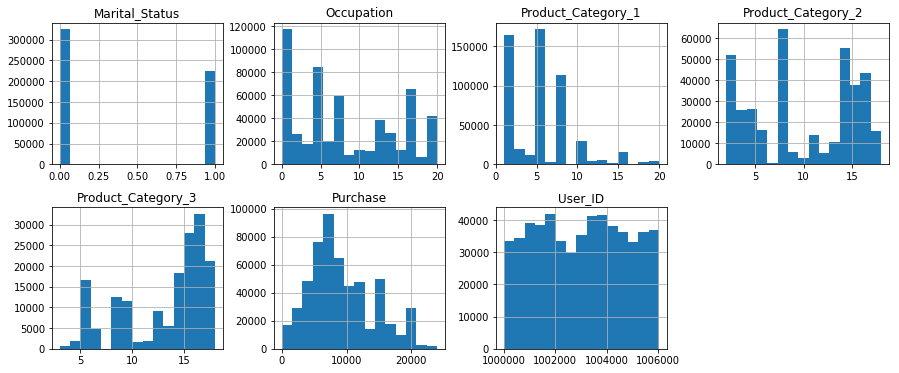

In [11]:
# Item_Weight has NANs
sig_numerical = ["Purchase", "Occupation", "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3", "User_ID"]
dis = train[sig_numerical].hist(bins=15, figsize=(15,6), layout=(2,4))

Visualising of significant categorical variables

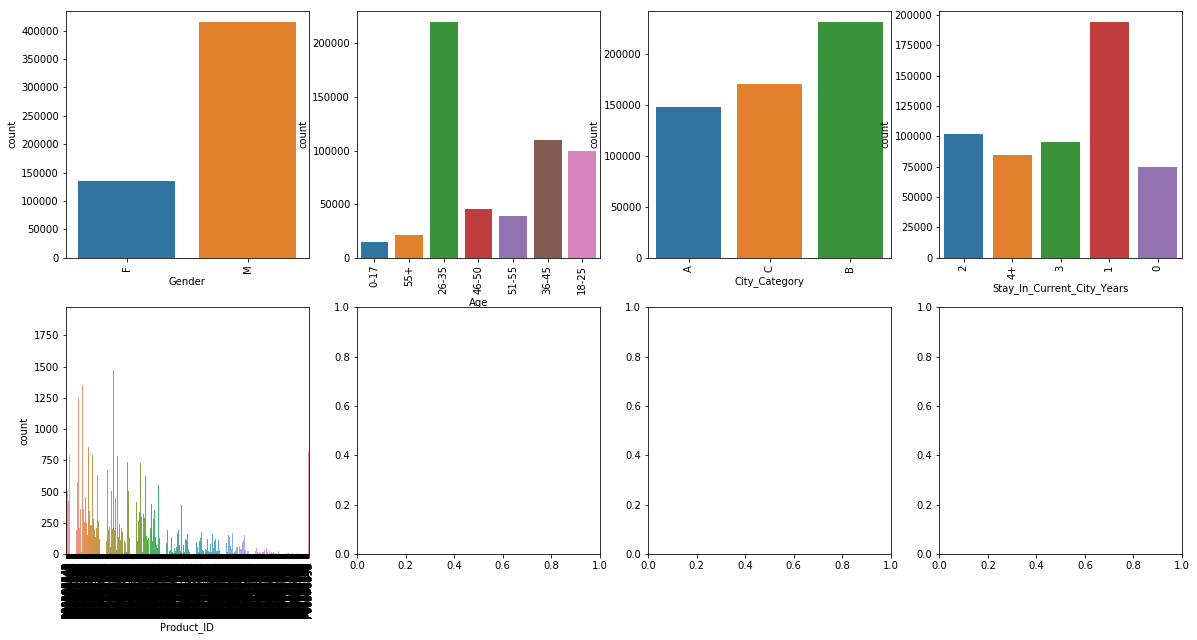

In [12]:
sig_categorical = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years", "Product_ID"]
fig, ax = plt.subplots(2,4, figsize=(20,10))

# Loop over every categorical variable to create countplot
for var, subplot in zip(sig_categorical, ax.flatten()):
    sns.countplot(train[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [13]:
train.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [14]:
train.Age.value_counts()  # Whether the product is low fat or not

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [15]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [16]:
train.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [17]:
train.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00000142    1152
             ... 
P00051742       1
P00336242       1
P00167242       1
P00300742       1
P00077242       1
P00077342       1
P00353742       1
P00365942       1
P00239442       1
P00107842       1
P00133042       1
P00070142       1
P00172642       1
P00224642       1
P00069742       1
P00340742       1
P00338242       1
P00260742       1
P00075042       1
P0097642        1
P00298842       1
P00215142       1
P00299042       1
P00106342       1
P00013842 

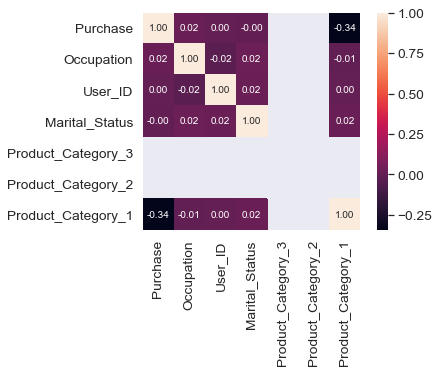

In [19]:
k = 10 #number of variables for heatmap
cormat=train.corr()
cols = cormat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Visual Representation of highly correlated features from mentioned above full Correlation matrix

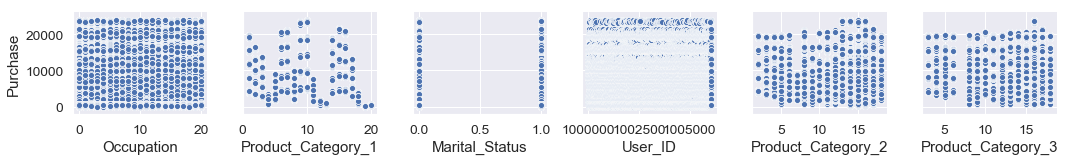

In [21]:
chartB = sns.pairplot(data=train,x_vars=['Occupation', 'Product_Category_1', 'Marital_Status', 'User_ID','Product_Category_2', 'Product_Category_3' ],y_vars=['Purchase'])
# NOTE : Correlation decending order, Item_Outlet_Sales has high Correlation with Item_MRP and Item_Outlet_Sales has low Correlation with Item_Weight

Looking at the distribution of "Purchase" (Dependant Variable)

In [22]:
train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Purchase is quite varied from the maximum and the minimum.

C:\Users\Sanjana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Kurt: -0.3383853975360749
Skew: 0.6001383671643447


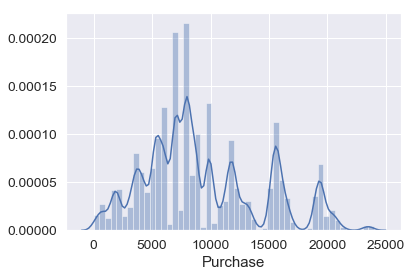

In [23]:
sns.distplot(train['Purchase'])
print('Kurt: ' + str(kurtosis(train['Purchase'])) + '\n' + 'Skew: ' +str(skew(train['Purchase'])))

Purchase is definitely skewed and not normal. We will log it when splitting into the test set

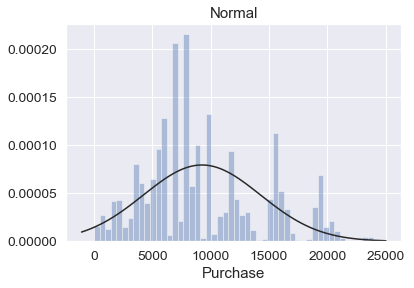

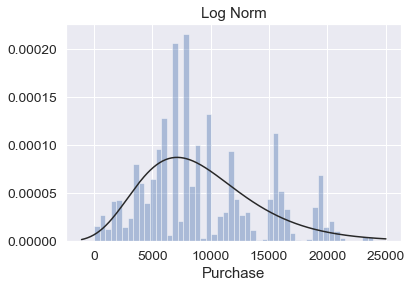

In [24]:
plt.figure(1); plt.title('Normal')
sns.distplot(train['Purchase'], kde=False, fit=stats.norm)

plt.figure(2); plt.title('Log Norm')
sns.distplot(train['Purchase'], kde=False, fit=stats.lognorm)

Logging it will definitely fit the data better

# Cleaning Data

In [85]:
train_CD = train.copy()   # copy training dataset
test_CD = test.copy()   # copy test dataset

Transformations :

Fix a few incorrect values; these values either had typos or had 'garage built' after house was sold.

Impute 0 values for variables where nulls likely mean absence of the attribute.

Calculate several aggregate variables on square footage and baths.

Change 'YearBuilt' to an 'AgeSold' variable which is slightly more accurate.

Add a 'TotalArea' feature that includes the garage.

Change a few values for the year of remodeling as they were listed as remodeled after house sold.

In [86]:
train_CD.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [87]:
def df_transform(df):
# assign ltrain_CDabels for Item_Fat_Content
    df['Age'] = df['Age'].replace('0-17', 1)
    df['Age'] = df['Age'].replace('18-25', 2)
    df['Age'] = df['Age'].replace('26-35', 3)
    df['Age'] = df['Age'].replace('36-45', 4)
    df['Age'] = df['Age'].replace('46-50', 5)
    df['Age'] = df['Age'].replace('51-55', 6)
    df['Age'] = df['Age'].replace('55+', 7)
    df['Age'] = df['Age'].astype(int)
    
    return df

In [88]:
train_CD = df_transform(train_CD)
train_CD.Age.value_counts()

3    219587
4    110013
2     99660
5     45701
6     38501
7     21504
1     15102
Name: Age, dtype: int64

In [89]:
#'Product_Category_2'(Numerical) has 173638 NANs
train_CD.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [90]:
#'Product_Category_3'(Numerical) has 383247 NANs
train_CD.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

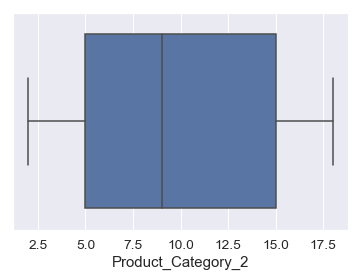

In [28]:
sns.boxplot('Product_Category_2',data=train_CD)     # X axis

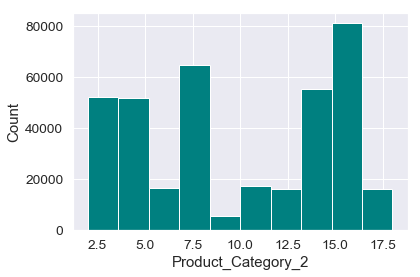

The Mean age of passengers is : 9
The Median age of passengers is : 9
The Standard Deviation age of passengers is : 5


In [91]:
train_CD.Product_Category_2.hist(bins=10,color='teal')
plt.xlabel('Product_Category_2')
plt.ylabel('Count')
plt.show()
print("The Mean age of passengers is :", int(train_CD.Product_Category_2.mean()))
print("The Median age of passengers is :", int(train_CD.Product_Category_2.median()))
print("The Standard Deviation age of passengers is :", int(train_CD.Product_Category_2.std()))

Mean and Median are same, it is normal distributed. we can fill NANs with median or mean. 

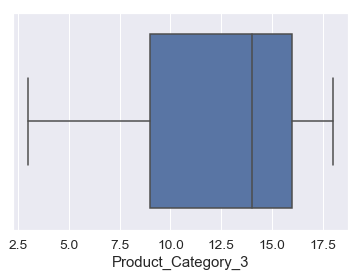

In [30]:
sns.boxplot('Product_Category_3',data=train_CD)     # X axis

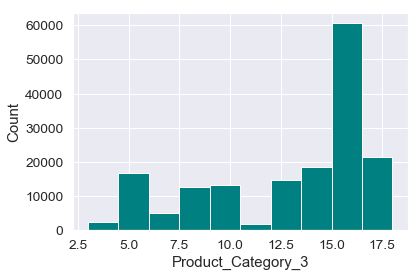

The Mean age of passengers is : 12
The Median age of passengers is : 14
The Standard Deviation age of passengers is : 4


In [92]:
train_CD.Product_Category_3.hist(bins=10,color='teal')
plt.xlabel('Product_Category_3')
plt.ylabel('Count')
plt.show()
print("The Mean age of passengers is :", int(train_CD.Product_Category_3.mean()))
print("The Median age of passengers is :", int(train_CD.Product_Category_3.median()))
print("The Standard Deviation age of passengers is :", int(train_CD.Product_Category_3.std()))

Mean is less than Median, So it is left skewed distributed. we can fill NANs with median.

In [ ]:
#def median_Category_map(feature):
#
#    le = LabelEncoder()    
#    feature = le.fit_transform(feature)  
#    med_Category = train.groupby(feature, as_index=True)['Item_Outlet_Sales'].median()
#    med_Category_length = len(med_Category)
#    numbers = np.linspace(0, med_Category_length, (med_Category_length+1))
#    med_Weight_dict = dict(zip(numbers, med_Category))
#    return med_Category_dict

In [93]:
PC2_median = train_CD.Product_Category_2.median()
PC3_median = train_CD.Product_Category_3.median()
#filling the missing Product_Category values in train and test datasets
train_CD.Product_Category_2.fillna(PC2_median,inplace=True)    # median value for Married is 9
train_CD.Product_Category_3.fillna(PC3_median,inplace=True)    # median frequent value for Married is 12

#train_CD["Product_Category_2"] = train_CD['Product_Category_2'].transform(lambda x: x.fillna(x.median()))
#train_CD["Product_Category_3"] = train_CD['Product_Category_3'].transform(lambda x: x.fillna(x.median()))

In [94]:
#checknulls(train_CD)
train_CD.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [95]:
train_CD.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,F,1,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,7,16,C,4+,0,8,9.0,14.0,7969
5,1000003,P00193542,M,3,15,A,3,0,1,2.0,14.0,15227
6,1000004,P00184942,M,5,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,5,7,B,2,1,1,15.0,14.0,15854
8,1000004,P0097242,M,5,7,B,2,1,1,16.0,14.0,15686
9,1000005,P00274942,M,3,20,A,1,1,8,9.0,14.0,7871


In [96]:
test_CD = df_transform(test_CD)
test_CD.Age.value_counts()

3    93428
4    46711
2    42293
5    19577
6    16283
7     9075
1     6232
Name: Age, dtype: int64

In [97]:
#filling the missing Product_Category values in train and test datasets
test_CD.Product_Category_2.fillna(PC2_median,inplace=True)    # median value for Married is 9
test_CD.Product_Category_3.fillna(PC3_median,inplace=True)    # median frequent value for Married is 12

In [98]:
test_CD.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [99]:
test_CD.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233589,1006030,P00241442,M,3,17,C,1,1,2,15.0,14.0
233590,1006032,P00252442,M,5,7,A,3,0,8,9.0,14.0
233591,1006033,P00127642,M,6,13,B,1,1,1,2.0,15.0
233592,1006035,P00135742,F,3,1,C,3,0,6,8.0,14.0
233593,1006036,P00255442,F,3,15,B,4+,1,8,9.0,14.0
233594,1006036,P00118942,F,3,15,B,4+,1,8,9.0,14.0
233595,1006036,P00254642,F,3,15,B,4+,1,5,8.0,14.0
233596,1006036,P00031842,F,3,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,5,1,C,4+,0,10,16.0,14.0
233598,1006039,P00316642,F,5,0,B,4+,1,4,5.0,14.0


# Feature engineering

Favouring ordinal:

Ordinal Is favoured in this case as it creates ranking for the model to recognise. Some of the categories are simply "present" or "not present" but require a scale.

Grouping variabes:

Grouping qualities and surface area were done as there was significant correlations between the the different all the qualities and surface areas

In [100]:
train_FE = train_CD.copy()   # copy training dataset
test_FE = test_CD.copy()   # copy test dataset

In [101]:
train_FE["TrainOrTest"] = "train"
test_FE["TrainOrTest"] = "test"
all = pd.concat([train_FE, test_FE], sort=False) # use sort=False to maintain Features order unchange
# Note : after combined datasets, NAN populated in Loan_Status for test dataset
all.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
User_ID,1000001,1000001,1000001,1000001,1000002,1000003,1000004,1000004,1000004,1000005
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442,P00193542,P00184942,P00346142,P0097242,P00274942
Gender,F,F,F,F,M,M,M,M,M,M
Age,1,1,1,1,7,3,5,5,5,3
Occupation,10,10,10,10,16,15,7,7,7,20
City_Category,A,A,A,A,C,A,B,B,B,A
Stay_In_Current_City_Years,2,2,2,2,4+,3,2,2,2,1
Marital_Status,0,0,0,0,0,0,1,1,1,1
Product_Category_1,3,1,12,12,8,1,1,1,1,8
Product_Category_2,9,6,9,14,9,2,8,15,16,9


In [102]:
all.shape      # (783667, 13)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null int32
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
TrainOrTest                   783667 non-null object
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 80.7+ MB


In [103]:
# dtype : object to Int64   # 3631 unique types
all['Product_ID'] =  list(pd.factorize(all['Product_ID'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [104]:
# dtype : object to Int64   # 2 unique types
all['Gender'] =  list(pd.factorize(all['Gender'])[0])   # Male as 1 and Female as 0 ==> Is_Female

In [105]:
# dtype : object to Int64   # 3 unique types
all['City_Category'] =  list(pd.factorize(all['City_Category'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [106]:
# dtype : object to Int64   # 5 unique types
all['Stay_In_Current_City_Years'] =  list(pd.factorize(all['Stay_In_Current_City_Years'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [107]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null int64
Gender                        783667 non-null int64
Age                           783667 non-null int32
Occupation                    783667 non-null int64
City_Category                 783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int64
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
TrainOrTest                   783667 non-null object
dtypes: float64(3), int32(1), int64(8), object(1)
memory usage: 80.7+ MB


In [108]:
all.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
User_ID,1000001,1000001,1000001,1000001,1000002,1000003,1000004,1000004,1000004,1000005
Product_ID,0,1,2,3,4,5,6,7,8,9
Gender,0,0,0,0,1,1,1,1,1,1
Age,1,1,1,1,7,3,5,5,5,3
Occupation,10,10,10,10,16,15,7,7,7,20
City_Category,0,0,0,0,1,0,2,2,2,0
Stay_In_Current_City_Years,0,0,0,0,1,2,0,0,0,3
Marital_Status,0,0,0,0,0,0,1,1,1,1
Product_Category_1,3,1,12,12,8,1,1,1,1,8
Product_Category_2,9,6,9,14,9,2,8,15,16,9


In [110]:
all = all.drop(['User_ID', 'TrainOrTest'], axis=1)  # do we need to drop Product_ID ?

In [111]:
all.head(10).transpose()  # when we use transpose(), all values are po;ulated as float64

,0,1,2,3,4,5,6,7,8,9
Product_ID,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Gender,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Age,1.0,1.0,1.0,1.0,7.0,3.0,5.0,5.0,5.0,3.0
Occupation,10.0,10.0,10.0,10.0,16.0,15.0,7.0,7.0,7.0,20.0
City_Category,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0
Stay_In_Current_City_Years,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0
Marital_Status,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Product_Category_1,3.0,1.0,12.0,12.0,8.0,1.0,1.0,1.0,1.0,8.0
Product_Category_2,9.0,6.0,9.0,14.0,9.0,2.0,8.0,15.0,16.0,9.0
Product_Category_3,14.0,14.0,14.0,14.0,14.0,14.0,17.0,14.0,14.0,14.0


# Normalisation

In [109]:
#Skewed Features
#We created a list of numerics to transform
#Use BoxCox Transformation / Scaling

BoxCox Transformation:

A boxcox transformation standardised our data; standardising the data reduced the range and effectively the variablity.

Standardization (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

In [112]:
n_train = train_FE.shape[0]
df = all[:n_train]

In [114]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in all:
    if all[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = all[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews = skews.drop(['Purchase'], axis=0)

In [115]:
skew_features

Product_ID                    1.025828
Product_Category_1            0.986592
Age                           0.808913
Occupation                    0.399766
Marital_Status                0.366913
Product_Category_2           -0.009786
City_Category                -0.286469
Stay_In_Current_City_Years   -0.306542
Gender                       -1.172729
Product_Category_3           -2.368714
Purchase                           NaN
dtype: float64

We need to handle the feature that has skewnees is greater than 0.75

In [116]:
high_skew = skew_features[skew_features > 0.75]
skew_index = high_skew.index
   
for i in high_skew.index:
    all[i]= boxcox1p(all[i], boxcox_normmax(all[i]+1))
        
skew_features2 = all[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
print(skews2.to_string())

                                skew
Occupation                  0.399766
Marital_Status              0.366913
Product_Category_1          0.285681
Age                         0.062626
Product_Category_2         -0.009786
Product_ID                 -0.061648
City_Category              -0.286469
Stay_In_Current_City_Years -0.306542
Gender                     -1.172729
Product_Category_3         -2.368714
Purchase                         NaN


Scaling:

Implementing the the RobustScaler help to scale the data, similarly as the boxcox transformation.

In scaling (also called min-max scaling), you transform the data such that the features are within a specific range e.g. [0, 1].

Definitions sourced from: https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization

In [133]:
train_df = all[:n_train]
test_df = all[n_train:]

scaler = RobustScaler()

X_train = train_df.drop(['Purchase'], axis=1)
X_test = test_df.drop(['Purchase'], axis=1)
y_train = train_df['Purchase']

X_train_scaled = scaler.fit(X_train).transform(X_train)
y_train_logged = np.log(train_df['Purchase'])               # skewness is 0.6 - do we need log transform ?
X_test_scaled= scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_logged_df = pd.DataFrame(y_train_logged)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [134]:
# check number of observations with originals
# X_train.shape   # 550068, 10
# X_test.shape   # (233599, 10)
y_train.shape    # (550068,)

(550068,)

In [121]:
X_train.head()  
# X_test.shape   # (233599, 10)
#y_train.shape    # (550068,)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.000000,0,0.709416,10,0,0,0,2.014719,9.0,14.0
1,0.795431,0,0.709416,10,0,0,0,0.831313,6.0,14.0
2,1.370256,0,0.709416,10,0,0,0,5.288345,9.0,14.0
3,1.836633,0,0.709416,10,0,0,0,5.288345,14.0,14.0
4,2.236032,1,2.230519,16,1,1,0,4.049521,9.0,14.0


# Feature Importance

In [135]:
#L1 penalties (lasso) will exclude variables that are not too well correlated.
lasso_fi=Lasso(alpha=0.001)
lasso_fi.fit(X_train_scaled,y_train_logged)
FI_lasso = pd.DataFrame({"Feature Importance":lasso_fi.coef_}, index=X_train.columns)
FI_sorted = FI_lasso.sort_values("Feature Importance",ascending=False)
print(FI_sorted.to_string())

                            Feature Importance
Gender                                0.026134
Product_Category_2                    0.022920
Age                                   0.022469
Product_Category_3                    0.001573
Occupation                            0.001526
City_Category                         0.000000
Stay_In_Current_City_Years           -0.000000
Marital_Status                       -0.001419
Product_ID                           -0.181113
Product_Category_1                   -0.620876


# Models :

Assessing Models: We utilised the Root Mean Squared Error (RMSE) to identify the performance of the train and test, ultimately, to indicate any overfitting/underfitting in the models. Cross Validation assisted us with running permutations of the different parameters to produce the most effective model with the least RMSE

Models Performed:

Linear Regression

Decision Regressor

Stochastic Gradient Decent(SGD)

In [136]:
# Root mean squared error (RMSE)  -- Cross validation is required for large datasets ??
def rmse(y_pred, y_test):
    return np.sqrt(mean_squared_error(y_test, y_pred))


class CvScore(object):
    def __init__(self, list, name_list, X, y, folds=5, score='neg_mean_squared_error', seed=66, split=0.33):
        self.X = X
        self.y = y
        self.folds = folds
        self.score = score
        self.seed = seed
        self.split = split
        self.model = list[0]
        self.list = list
        self.name = name_list[0]
        self.name_list = name_list
    
    def cv(self):
        cv_score = cross_val_score(self.model, self.X, self.y, cv=self.folds, scoring=self.score)
        score_array = np.sqrt(-cv_score)
        mean_rmse = np.mean(score_array)
        print("Mean RMSE: ", mean_rmse)
    
    def cv_list(self):
        for name, model in zip(self.name_list, self.list):
            cv_score = cross_val_score(model, self.X, self.y, cv=self.folds, scoring=self.score)
            score_array = np.sqrt(-cv_score)
            mean_rmse = np.mean(score_array)
            std_rmse = np.std(score_array)
            print("{}: {:.5f}, {:.4f}".format(name, mean_rmse, std_rmse))

In [137]:
from sklearn.tree import DecisionTreeRegressor
lr = LinearRegression()

# Best parameters found:  {'max_depth': 200} 0.12673567602317132
dtr = DecisionTreeRegressor(max_depth=200)

sgd = linear_model.SGDRegressor(loss = "squared_loss", average=True)

regression_list = [lr, dtr, sgd]
name_list = ["Linear", "Decision Tree", "Stochastic Gradient Decent"]

In [139]:
#import time
start_time = time.time()
scores = CvScore(regression_list, name_list, X_train_scaled,y_train_logged)
scores.cv_list()
stop_time = time.time()
print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

#Linear: 0.65322, 0.1156
#Decision Tree: 0.55335, 0.1448
#Stochastic Gradient Decent: 0.65323, 0.1155
#Execution time in 17.65s ms

Linear: 0.65322, 0.1156
Decision Tree: 0.55339, 0.1446


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_it

Stochastic Gradient Decent: 0.65323, 0.1155
Execution time in 17.11s ms


In [140]:
#from sklearn.model_selection import GridSearchCV
#import time
from sklearn.model_selection import RandomizedSearchCV

class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        Random_search = RandomizedSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        start_time = time.time()
        Random_search.fit(X,y)
        print("Best parameters found: ", Random_search.best_params_, np.sqrt(-Random_search.best_score_))
        Random_search.cv_results_['mean_test_score'] = np.sqrt(-Random_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(Random_search.cv_results_)[['params','mean_test_score','std_test_score']])
        stop_time = time.time()
        print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
        #print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [142]:
# Decision Tree Regression
#p_grid = {'n_estimators':  [6, 8 ,10, 12, 14] }

rfr_param_grid = {
#     'n_estimators':[100, 200, 400, 600, 800],
#     'max_depth': [80, 120, 160, 200]
     'max_depth': [100, 200, 400, 600, 800]
}

grid( DecisionTreeRegressor()).grid_get(X_train_scaled,y_train_logged,rfr_param_grid)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters found:  {'max_depth': 200} 0.5717529224573157
               params  mean_test_score  std_test_score
0  {'max_depth': 100}         0.571936        0.191570
1  {'max_depth': 200}         0.571753        0.191751
2  {'max_depth': 400}         0.571898        0.191656
3  {'max_depth': 600}         0.571987        0.191604
4  {'max_depth': 800}         0.571828        0.191550
Execution time in 73.61s ms


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\skle

Ensemble

In [143]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# class object group for ensembling the model predictions together
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [144]:
# even weighted model
variables = 3

w1 = 1/variables
w2 = 1/variables
w3 = 1/variables
#w4 = 1/variables

#import time
start_time = time.time()
weight_avg = AverageWeight(mod = [lr, dtr, sgd],weight=[w1,w2,w3])

score = rmse_cv(weight_avg,X_train_scaled,y_train_logged)
print(score.mean())
stop_time = time.time()
print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_it

0.5514673464735819
Execution time in 42.02s ms


NOTE : select the model which least RMSE value from even weighted model, Linear Reg, Decision Tree Reg.

Linear: 0.65322, 0.1156
    
Decision Tree: 0.55335, 0.1448
    
Stochastic Gradient Decent: 0.65323, 0.1155

even weighted model : 0.55146

# Test Data

In [145]:
a = Imputer().fit_transform(X_train_scaled)
b = Imputer().fit_transform(y_train_logged.values.reshape(-1,1)).ravel()

ensemble_model = AverageWeight(mod = [lr, dtr, sgd],weight=[w1,w2,w3])
ensemble_model = ensemble_model.fit(a,b)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [147]:
prediction = np.exp(ensemble_model.predict(X_test_scaled))
print(prediction)

#sales_test_FE[['User_ID', 'Product_ID']]
User_list = test_FE['User_ID']
Product_list = test_FE[ 'Product_ID']
submission =pd.DataFrame({'User_ID': User_list, 'Product_ID': Product_list, 'Purchase': prediction})
submission#.to_csv("submission.csv",index=False)

[14076.25809607  8758.96964944  5957.44538756 ... 10973.37872433
  7670.35558967  3497.79884628]


,User_ID,Product_ID,Purchase
0,1000004,P00128942,14076.258096
1,1000009,P00113442,8758.969649
2,1000010,P00288442,5957.445388
3,1000010,P00145342,4757.272635
4,1000011,P00053842,5032.078447
5,1000013,P00350442,10305.700811
6,1000013,P00155442,9843.664938
7,1000013,P0094542,12709.125947
8,1000015,P00161842,6645.750447
9,1000022,P00067942,7023.741213


In [148]:
submission.to_csv("Purchase_submission.csv",index=False)